# Introducción regresión con GLM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/franciscogarate/matact4fbs

Cloning into 'matact4fbs'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 54 (delta 22), reused 16 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 1.63 MiB | 13.80 MiB/s, done.
Resolving deltas: 100% (22/22), done.


Importamos el fichero de datos para posteriormente trabajar con el

In [ ]:
df = pd.read_excel('matact4fbs/data/datos.xlsx')
df.head()

,temp,lluvia,alquileres
0,42,1,55
1,38,0,132
2,29,0,83
3,12,1,17
4,28,1,31


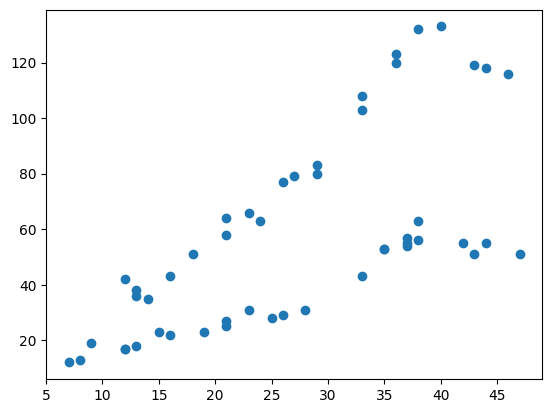

In [ ]:
x = df.temp
y = df.alquileres
plt.scatter(x, y)
plt.show()

## Regresión lineal con scipy

In [ ]:
import scipy.stats as st
lr = st.linregress(x,y)
lr

LinregressResult(slope=np.float64(2.029951413643245), intercept=np.float64(2.3077176619951913), rvalue=np.float64(0.6799789898553188), pvalue=np.float64(5.60463312698698e-08), stderr=np.float64(0.3159444288394127), intercept_stderr=np.float64(9.300579745654684))

In [ ]:
lr.intercept, lr.slope

(np.float64(2.3077176619951913), np.float64(2.029951413643245))

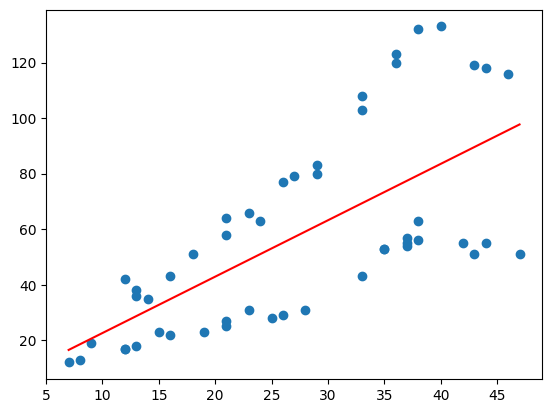

In [ ]:
x_plot = np.linspace(x.min(), x.max(), 100)
y_plot = lr.intercept + lr.slope * x_plot
plt.plot(x_plot, y_plot, color='red')
plt.scatter(x, y)
plt.show()

## Regresión lineal con statsmodels

In [ ]:
import numpy as np
import statsmodels.api as sm
x = df.temp
y = df.alquileres
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             alquileres   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     41.28
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           5.60e-08
Time:                        15:21:06   Log-Likelihood:                -232.01
No. Observations:                  50   AIC:                             468.0
Df Residuals:                      48   BIC:                             471.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3077      9.301      0.248      0.8

In [ ]:
df['estimacion_lr'] = results.predict(sm.add_constant(x))
df['error_lr'] = results.resid
df.head()

,temp,lluvia,alquileres,estimacion_lr,error_lr
0,42,1,55,87.565677,-32.565677
1,38,0,132,79.445871,52.554129
2,29,0,83,61.176309,21.823691
3,12,1,17,26.667135,-9.667135
4,28,1,31,59.146357,-28.146357


Calcular RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(df.alquileres, df.estimacion_lr))
rmse_lr

np.float64(25.05968919860344)

## Regresión GLM con statsmodels

Primero usamos la regresión lineal = OLS (Minimos cuadraticos ordinarios)

In [ ]:
import statsmodels.formula.api as smf

formula = 'alquileres ~ temp + lluvia'
model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             alquileres   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           9.82e-22
Time:                        15:23:32   Log-Likelihood:                -196.06
No. Observations:                  50   AIC:                             398.1
Df Residuals:                      47   BIC:                             403.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0799      5.038      5.574      0.0

In [ ]:
model2 = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result2 = model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             alquileres   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -171.46
Date:                Wed, 22 Oct 2025   Deviance:                       57.763
Time:                        15:23:36   Pearson chi2:                     56.9
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3013      0.060     54.697      0.0

In [ ]:
df['estimacion_glm'] = result2.predict()
df['error_glm'] = result2.resid_response
df.head()

,temp,lluvia,alquileres,estimacion_lr,error_lr,estimacion_glm,error_glm
0,42,1,55,87.565677,-32.565677,58.138712,-3.138712
1,38,0,132,79.445871,52.554129,112.028141,19.971859
2,29,0,83,61.176309,21.823691,80.081694,2.918306
3,12,1,17,26.667135,-9.667135,18.988288,-1.988288
4,28,1,31,59.146357,-28.146357,34.488549,-3.488549


Calcular RMSE

In [ ]:
rmse_glm = np.sqrt(mean_squared_error(df.alquileres, df.estimacion_glm))
rmse_glm

np.float64(9.922829409250353)

## Machine learning

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df = pd.read_excel('matact4fbs/data/datos.xlsx')
df.head()

,temp,lluvia,alquileres
0,42,1,55
1,38,0,132
2,29,0,83
3,12,1,17
4,28,1,31


In [35]:
X = df.drop(columns=['alquileres'])
y = df.alquileres

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
modelo = Ridge()
modelo.fit(X_train_scaled, y_train)

Ridge()

In [41]:
y_pred = modelo.predict(X_test_scaled)

print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5}')
print(f'R2: {r2_score(y_test, y_pred):.4f}')

RMSE: 10.35751962901438
R2: 0.8739
